In [73]:
from pathlib import Path
import os
import matplotlib.pyplot as plt

In [10]:
metrics_fold = Path('/home/e_radionova/PROJECT/optimal-kernels/IJCAI/metrics_txt')
exp = 'acdc'
path = metrics_fold / exp

In [11]:
metrics_files = os.listdir(path)
metrics_files = [file for file in metrics_files if 'k_size' in file and 'loss' not in file]

In [61]:
initialized = sorted([file for file in metrics_files if 'without' not in file])
classical = sorted([file for file in metrics_files if 'without' in file])

In [62]:
classical

['unet_init_acdc_b8_without_k_size_11.txt',
 'unet_init_acdc_b8_without_k_size_15.txt',
 'unet_init_acdc_b8_without_k_size_19.txt',
 'unet_init_acdc_b8_without_k_size_29.txt',
 'unet_init_acdc_b8_without_k_size_39.txt',
 'unet_init_acdc_b8_without_k_size_7.txt']

In [64]:
initialized

['unet_init_acdc_b8_with_k_size_11.txt',
 'unet_init_acdc_b8_with_k_size_15.txt',
 'unet_init_acdc_b8_with_k_size_19.txt',
 'unet_init_acdc_b8_with_k_size_29.txt',
 'unet_init_acdc_b8_with_k_size_39.txt',
 'unet_init_acdc_b8_with_k_size_7.txt']

In [65]:
dct_classic = {}
for i in range(len(classical)):
    key = classical[i].split('.')[0].split('_')[-1]
    with open(path / classical[i]) as f:
        lines = f.readlines()[-4:]
    dct_dices = {}
    for k in lines:
        dct_dices[k.split(':')[0]] = float(k.split(':')[1])
    dct_classic[key] = dct_dices

In [66]:
dct_initialized = {}
for i in range(len(initialized)):
    key = initialized[i].split('.')[0].split('_')[-1]
    with open(path / initialized[i]) as f:
        lines = f.readlines()[-4:]
    dct_dices = {}
    for k in lines:
        dct_dices[k.split(':')[0]] = float(k.split(':')[1])
    dct_initialized[key] = dct_dices

In [91]:
dice_0_classic = []
dice_1_classic = []
dice_2_classic = []
for key in dct_classic.keys():
    dice_0_classic.append(dct_classic[key]['best DICE_0'])
    dice_1_classic.append(dct_classic[key]['best DICE_1'])
    dice_2_classic.append(dct_classic[key]['best DICE_2'])

In [92]:
dice_0_classic.insert(0, dice_0_classic[-1])
dice_0_classic.pop(-1)

dice_1_classic.insert(0, dice_1_classic[-1])
dice_1_classic.pop(-1)

dice_2_classic.insert(0, dice_2_classic[-1])
dice_2_classic.pop(-1)

0.8830738746006666

In [100]:
dice_0_init = []
dice_1_init = []
dice_2_init = []
for key in dct_classic.keys():
    dice_0_init.append(dct_initialized[key]['best DICE_0'])
    dice_1_init.append(dct_initialized[key]['best DICE_1'])
    dice_2_init.append(dct_initialized[key]['best DICE_2'])

In [101]:
dice_0_init.insert(0, dice_0_init[-1])
dice_0_init.pop(-1)

dice_1_init.insert(0, dice_1_init[-1])
dice_1_init.pop(-1)

dice_2_init.insert(0, dice_2_init[-1])
dice_2_init.pop(-1)

0.8967986270379463

In [131]:
x = [7, 11,15,19,29, 39]

In [132]:
import warnings
warnings.filterwarnings("ignore")

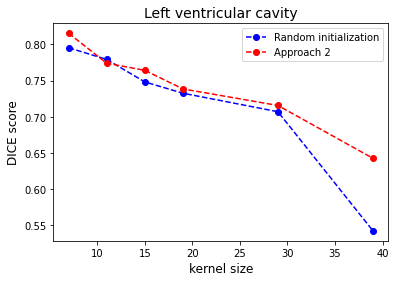

In [133]:
plt.plot(x, dice_0_classic, '--bo', label='Random initialization', c='b')
plt.plot(x, dice_0_init, '--bo', label='Approach 2 ', c='r')
plt.legend()
plt.xlabel('kernel size', fontsize = 12)
plt.ylabel('DICE score', fontsize = 12)
plt.title('Left ventricular cavity', fontsize = 14);

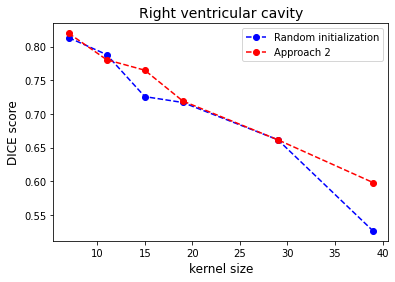

In [134]:
plt.plot(x, dice_1_classic, '--bo', label='Random initialization', c='b')
plt.plot(x, dice_1_init, '--bo', label='Approach 2', c='r')
plt.legend()
plt.xlabel('kernel size', fontsize = 12)
plt.ylabel('DICE score', fontsize = 12)
plt.title('Right ventricular cavity', fontsize = 14);

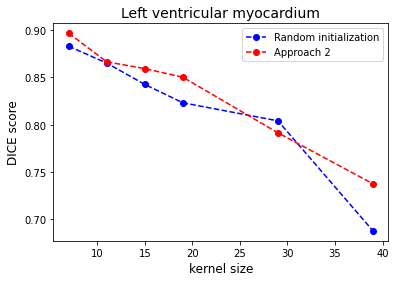

In [135]:
plt.plot(x, dice_2_classic, '--bo', label='Random initialization', c='b')
plt.plot(x, dice_2_init, '--bo', label='Approach 2', c='r')
plt.legend()
plt.xlabel('kernel size', fontsize = 12)
plt.ylabel('DICE score', fontsize = 12)
plt.title('Left ventricular myocardium', fontsize = 14);

### Birds

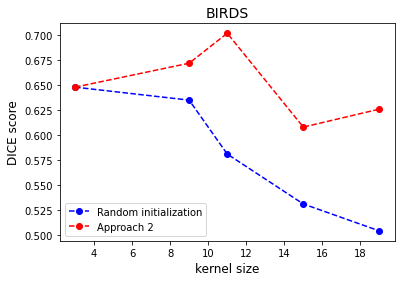

In [140]:
x = [3, 9, 11, 15, 19]
y1 = [0.648, 0.635, 0.581, 0.531, 0.504]
y2 = [0.648, 0.672, 0.702, 0.608, 0.626]

plt.plot(x, y1, '--bo', label='Random initialization', c='b')
plt.plot(x, y2, '--bo', label='Approach 2', c='r')
plt.legend()
plt.xlabel('kernel size', fontsize = 12)
plt.ylabel('DICE score', fontsize = 12)
plt.title('BIRDS', fontsize = 14);